In [1]:
import torch
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt

**Step 0: Preparing data**

In [2]:
training_data=torchvision.datasets.MNIST(root='./data',
                                         train=True,
                                         transform=torchvision.transforms.ToTensor(),
                                         download=True
                                         )
test_data=torchvision.datasets.MNIST(root='./data',
                                     train=False,
                                     transform=torchvision.transforms.ToTensor()
                                     )

In [3]:
training_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: ToTensor()

**Splitting Data in batches using DataLoader**

In [4]:
train_loader=torch.utils.data.DataLoader(dataset=training_data,
                                         batch_size=128,
                                         num_workers=2
                                         )
test_loader=torch.utils.data.DataLoader(dataset=test_data,
                                         batch_size=128,
                                         num_workers=2
                                         )

**Getting one batch**

In [5]:
example=iter(train_loader)
image,label=next(example)

**Plotting Few images of First Batch**

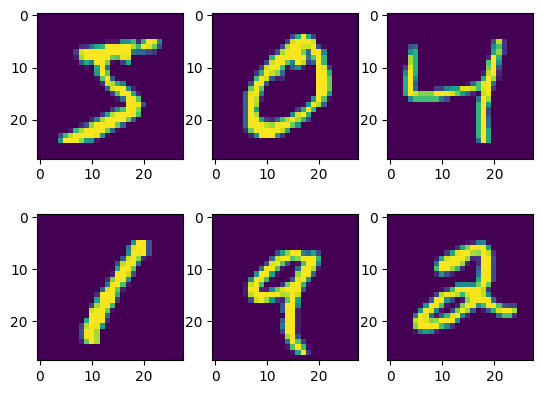

In [6]:
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.imshow(image[i][0])
plt.show()

**Setting Parameters**

In [7]:
num_epochs=3
learning_rate=0.001
input_size=784 #(28*28)
hidden_units=500 #(hidden layer 1: number of units)
output_size=10 #(10 unique labels for number of digits from 0-9)

**Step 1: Defining Neural Network**

In [8]:
device=torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [9]:
class neural_nn(nn.Module):
  def __init__(self,input_size,hidden_units,output_size):
    super(neural_nn,self).__init__()
    self.input_size=input_size
    self.l1=nn.Linear(input_size,hidden_units)
    self.relu=nn.ReLU()
    self.l2=nn.Linear(hidden_units,output_size)
  def forward(self,x):
    out=self.l1(x)
    out=self.relu(out)
    out=self.l2(out)
    return out
model=neural_nn(input_size,hidden_units,output_size).to(device)

**Step2: optimizer and Loss**

In [10]:
optimizer=torch.optim.Adam(params=model.parameters(),lr=learning_rate)
criterion=nn.CrossEntropyLoss()

**Training the neural network**

In [13]:
number_of_steps=len(train_loader)
for epochs in range(num_epochs):
  for i,(images,labels) in enumerate(train_loader):
    images=images.reshape(-1,28*28).to(device)
    labels=labels.to(device)
    #Forward_pass
    outputs=model(images)
    loss=criterion(outputs,labels)
    #Backward_pass and updation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    print('iteration:'+str(epochs)+' step:'+str(i)+' loss:'+str(loss.item()))

iteration:0 step:0 loss:0.05361231043934822
iteration:0 step:1 loss:0.11463505029678345
iteration:0 step:2 loss:0.03350849449634552
iteration:0 step:3 loss:0.1470109522342682
iteration:0 step:4 loss:0.05977089703083038
iteration:0 step:5 loss:0.11525452882051468
iteration:0 step:6 loss:0.09099026024341583
iteration:0 step:7 loss:0.07683011144399643
iteration:0 step:8 loss:0.19908230006694794
iteration:0 step:9 loss:0.13525766134262085
iteration:0 step:10 loss:0.11802580207586288
iteration:0 step:11 loss:0.0386311374604702
iteration:0 step:12 loss:0.06742075830698013
iteration:0 step:13 loss:0.05403180420398712
iteration:0 step:14 loss:0.02405981905758381
iteration:0 step:15 loss:0.07095421850681305
iteration:0 step:16 loss:0.034529998898506165
iteration:0 step:17 loss:0.041976332664489746
iteration:0 step:18 loss:0.050677742809057236
iteration:0 step:19 loss:0.02587233856320381
iteration:0 step:20 loss:0.10209948569536209
iteration:0 step:21 loss:0.07617934048175812
iteration:0 step:22

In [14]:
with torch.no_grad():
  n_samples=0
  n_correct=0
  for images,labels in test_loader:
    images=images.reshape(-1,28*28).to(device)
    labels=labels.to(device)
    outputs=model(images)
    _,predicted=torch.max(outputs.data,1)
    n_correct+=(predicted==labels).sum().item()
    n_samples+=label.size(0)
accuracy=(n_correct*100)/n_samples
print(accuracy)



96.54865506329114
